In [3]:
import numpy as np
import pandas as pd

In [5]:
dataset=pd.read_csv("dataset.csv")

In [7]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [9]:
dataset["labels"]=dataset["class"].map({0:"Hate Speech",1:"Offensive Speech",2:"No hate or offensive"})

In [14]:
data=dataset[["tweet","labels"]]

In [42]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Speech
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Speech
24781,youu got wild bitches tellin you lies,Offensive Speech


In [54]:
import re
import nltk
import string

In [56]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

In [58]:
stemmer=nltk.SnowballStemmer("english")

In [98]:
def clean_data(text):
    text=str(text).lower()
    # text=re.sub('https?://\S+|www\.S+','',text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    #stopwords removal
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    #stemming text
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [100]:
data["tweet"]=data["tweet"].apply(clean_data)

C:\Users\SARAJIT\AppData\Local\Temp\ipykernel_11008\2823468588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [102]:
data

,tweet,labels
0,rt mayasolov woman complain clean hous amp ma...,No hate or offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Speech
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Speech
3,rt cganderson vivaba look like tranni,Offensive Speech
4,rt shenikarobert shit hear might true might f...,Offensive Speech
...,...,...
24778,muthafin lie coreyemanuel right tl trash mi...,Offensive Speech
24779,gone broke wrong heart babi drove redneck crazi,No hate or offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Speech
24781,youu got wild bitch tellin lie,Offensive Speech


In [106]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [110]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [112]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred=dt.predict(x_test)

In [120]:
from sklearn.metrics import confusion_matrix as cmx
cm=cmx(y_test,y_pred)
cm

array([[ 165,   36,  264],
       [  30, 1106,  243],
       [ 241,  211, 5883]], dtype=int64)

In [122]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

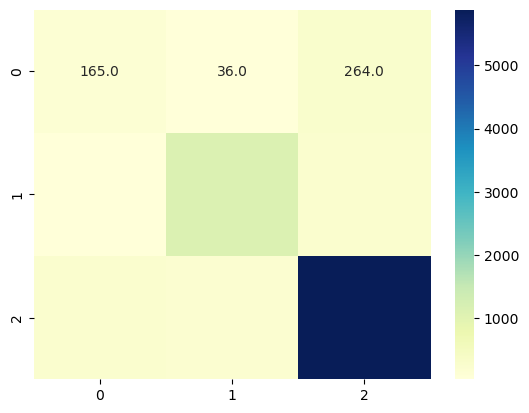

In [123]:
sns.heatmap(cm,annot=True,fmt=".1f",cmap="YlGnBu")

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87467905611933

In [140]:
sample="Kill all people protesting against government"
sample=clean_data(sample)

In [142]:
sample

'kill peopl protest govern'

In [144]:
data1=cv.transform([sample]).toarray()

In [146]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [148]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)